# Энергия ферромагнетика (2D)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать среднюю энергию $\langle E \rangle$ для указанной цепочки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1, 1.1, ..., 5.0]$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Средняя энергия для $L_x=4$ при температурах $kT \in [1, 1.1, ..., 5.0]$:

```
[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]
```


**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [17]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import njit, prange
from tqdm import tqdm

Задаём константы

In [18]:
Lx = np.arange(2, 9)
Ly = 4
kT = np.arange(1, 5.1, 0.1)

Функция считающая среднюю энергию

In [19]:
@njit(parallel = True)
def spin_energy_avg(Lx, Ly, kT, J = 1):
    """
    Функция считает среднюю энергию ферромагнетика в двуменрном случае 
    для решётки заданной параметрами размерности
    
    Параметры
    ---------
    Lx : int
        размерность решётки по оси х
        
    Ly : int
        размерность решётки по оси у
        
    kT: float
        температура, помноженная на константу Больцмана
        
    J: float
        константа взаиможействия спинов, в нашем задании принимается за 1
        
    Возвращаемое значение: 
    ----------------------
    Средняя энергия решётки размеров Lx на Ly, при температуре kT с констаной взаимодейтсвия J
    
    """
    n = Lx * Ly
    z = 0
    sum_E = 0
    for i in prange(2**n):
        spin_grid = np.empty(n)
        for j in prange(n):
            spin_grid[-j - 1] = -1 + 2 * ((i & 2**j) / 2**j)
        spin_grid = spin_grid.reshape(Lx, Ly)
        E = 0
        for k in range(Lx):
            for l in range (Ly):
                E -= J * spin_grid[k][l] * (spin_grid[(k + 1) % Lx][l] + spin_grid[k][(l + 1) % Ly])        
        z += np.exp(- 1 / kT * E)
        sum_E += E * np.exp(- E / kT)
    return 1 / (z * n) * sum_E

Посчитаем среднюю энергю для каждой решётки и темпеатуры с выводом времени

In [22]:
energy_array = np.empty((len(Lx), len(kT)))
i = 0
j = 0
for x in Lx:
    for t in kT:
        start_time = time.time()
        energy_array[i][j] = spin_energy_avg(x, 4, t)
        print(f"Время выполнения для решётки {x} x {4} при kT = {round(t, 1)}: ", time.time() - start_time, "с") 
        j += 1
    print("\n")
    i += 1
    j = 0

Время выполнения для решётки 2 x 4 при kT = 1.0:  0.0016682147979736328 с
Время выполнения для решётки 2 x 4 при kT = 1.1:  0.0007238388061523438 с
Время выполнения для решётки 2 x 4 при kT = 1.2:  0.000762939453125 с
Время выполнения для решётки 2 x 4 при kT = 1.3:  0.00031495094299316406 с
Время выполнения для решётки 2 x 4 при kT = 1.4:  0.0003757476806640625 с
Время выполнения для решётки 2 x 4 при kT = 1.5:  0.0003147125244140625 с
Время выполнения для решётки 2 x 4 при kT = 1.6:  0.00017905235290527344 с
Время выполнения для решётки 2 x 4 при kT = 1.7:  0.00017595291137695312 с
Время выполнения для решётки 2 x 4 при kT = 1.8:  0.0001556873321533203 с
Время выполнения для решётки 2 x 4 при kT = 1.9:  0.0001900196075439453 с
Время выполнения для решётки 2 x 4 при kT = 2.0:  0.0002079010009765625 с
Время выполнения для решётки 2 x 4 при kT = 2.1:  0.0003662109375 с
Время выполнения для решётки 2 x 4 при kT = 2.2:  0.0003437995910644531 с
Время выполнения для решётки 2 x 4 при kT = 2

Время выполнения для решётки 5 x 4 при kT = 1.0:  0.04407763481140137 с
Время выполнения для решётки 5 x 4 при kT = 1.1:  0.04724001884460449 с
Время выполнения для решётки 5 x 4 при kT = 1.2:  0.04133105278015137 с
Время выполнения для решётки 5 x 4 при kT = 1.3:  0.03858017921447754 с
Время выполнения для решётки 5 x 4 при kT = 1.4:  0.04176521301269531 с
Время выполнения для решётки 5 x 4 при kT = 1.5:  0.0382847785949707 с
Время выполнения для решётки 5 x 4 при kT = 1.6:  0.048195838928222656 с
Время выполнения для решётки 5 x 4 при kT = 1.7:  0.037467002868652344 с
Время выполнения для решётки 5 x 4 при kT = 1.8:  0.03886818885803223 с
Время выполнения для решётки 5 x 4 при kT = 1.9:  0.03847503662109375 с
Время выполнения для решётки 5 x 4 при kT = 2.0:  0.039411306381225586 с
Время выполнения для решётки 5 x 4 при kT = 2.1:  0.04941105842590332 с
Время выполнения для решётки 5 x 4 при kT = 2.2:  0.04549813270568848 с
Время выполнения для решётки 5 x 4 при kT = 2.3:  0.0473039150

Время выполнения для решётки 7 x 4 при kT = 4.3:  14.874547958374023 с
Время выполнения для решётки 7 x 4 при kT = 4.4:  14.7951340675354 с
Время выполнения для решётки 7 x 4 при kT = 4.5:  14.765673875808716 с
Время выполнения для решётки 7 x 4 при kT = 4.6:  14.822146892547607 с
Время выполнения для решётки 7 x 4 при kT = 4.7:  14.751699924468994 с
Время выполнения для решётки 7 x 4 при kT = 4.8:  14.583563089370728 с
Время выполнения для решётки 7 x 4 при kT = 4.9:  15.081571817398071 с
Время выполнения для решётки 7 x 4 при kT = 5.0:  14.991873025894165 с


Время выполнения для решётки 8 x 4 при kT = 1.0:  284.6078791618347 с
Время выполнения для решётки 8 x 4 при kT = 1.1:  268.36088395118713 с
Время выполнения для решётки 8 x 4 при kT = 1.2:  268.323251247406 с
Время выполнения для решётки 8 x 4 при kT = 1.3:  266.9523169994354 с
Время выполнения для решётки 8 x 4 при kT = 1.4:  265.54643988609314 с
Время выполнения для решётки 8 x 4 при kT = 1.5:  258.02241492271423 с
Время выпо

Сохраним полученный результат

In [23]:
with open('energy_array.npy', 'wb') as f:
    np.save(f, energy_array)

Выведем полученный массив

In [25]:
energy_array

array([[-1.99509474, -1.98967862, -1.98074878, -1.96731117, -1.94851445,
        -1.92375828, -1.89277291, -1.85565639, -1.81286316, -1.76514762,
        -1.71347563, -1.65892227, -1.60257405, -1.5454491 , -1.48844224,
        -1.43229537, -1.3775895 , -1.3247523 , -1.27407538, -1.22573609,
        -1.17982015, -1.13634286, -1.09526756, -1.05652101, -1.02000562,
        -0.98560898, -0.9532109 , -0.92268862, -0.89392045, -0.86678827,
        -0.84117913, -0.8169862 , -0.79410926, -0.77245486, -0.75193626,
        -0.73247322, -0.71399168, -0.69642337, -0.67970548, -0.66378023,
        -0.64859447],
       [-1.99711779, -1.99383665, -1.98825271, -1.97949351, -1.96659182,
        -1.94853206, -1.92432618, -1.89312223, -1.85433583, -1.80777902,
        -1.75375117, -1.69305981, -1.62695673, -1.55700043, -1.48487836,
        -1.41223059, -1.34050963, -1.27089443, -1.20425882, -1.14118312,
        -1.08199278, -1.02680913, -0.97560137, -0.92823315, -0.88450084,
        -0.84416295, -0.80696

Построим карту

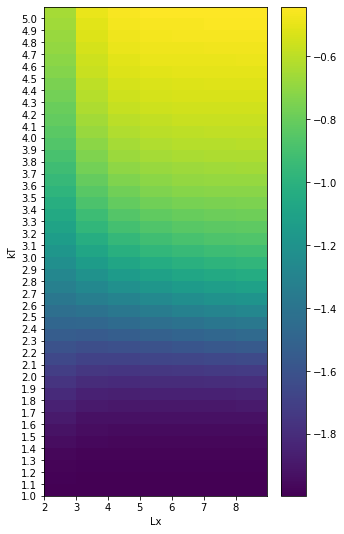

In [24]:
fig, ax = plt.subplots()

fig.set_figwidth(5)
fig.set_figheight(9)

pc = ax.pcolormesh(energy_array.transpose())

ax.set_xlabel('Lx')
ax.set_ylabel('kT')

ax.set_xticks(np.arange(len(Lx)))
ax.set_yticks(np.arange(len(kT)))

ax.set_xticklabels(Lx)
ax.set_yticklabels(kT.round(2))


fig.colorbar(pc)